In [1]:
from time import time
import logging
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s %(message)s')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.grid_search import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

/home/iri/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/iri/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
pd.read_csv?

In [4]:
df=pd.read_fwf('./sogo/user_tag_query.10W.TRAIN'
#                ,encoding='utf-8'
               , names=['ID', 'age', 'Gender', 'Education', 'QueryList']
              ,colspecs=[(0, 32),(33, 34),(35,36),(37,38),(39,-1)])

In [5]:
df.head(3)

,ID,age,Gender,Education,QueryList
0,22DD920316420BE2DF8D6EE651BA174B,1,1,4,���˫��\tŮ��\t�в�����ҳ �ƾ�\thttp://pan.baidu.co...
1,43CC3AF5A8D6430A3B572337A889AFE4,2,1,3,"���ݳ�������\t���鱡,�����,���ͻƻ軨����,�����,���\t..."
2,E97654BFF5570E2CCD433EA6128EAC19,4,1,0,��ʯ֮�����\t�̽�������\t��˳����\t�������³���\tba...


In [6]:
print df['QueryList'][0].decode('GB18030').encode('utf-8')

柔和双沟	女生	中财网首页 财经	http://pan.baidu.com/s/1plpjtn9	周公解梦大全查询2345	曹云金再讽郭德纲	总裁大人行行好	中财网第一财经传媒	教师节全文	男子砸毁15墓碑	黄岩岛最新填海图	引起的疲	缘来未迟落跑甜心不好惹	梁朝伟与替身同框	笑傲江湖电视剧任贤齐	小起名字女孩名字	海运行李到堪培拉	确定	诱爱99天 司少的天价宝贝	什么是遥控魔棒	徽信表情动态搞笑图片	教师节征文100字	安微联通网上营业厅	甜宠百分百:校草的萌萌未婚妻	豪门重生之暖爱成婚	nikehypershift和kd5哪个好看	韭菜炒鸡蛋	陈赫玩王者荣耀	虎牙楚河	三国演义小说txt下载	威县欧派	炒馍花怎么做好吃	黄岩岛最新消息2016年	中秋节诗句大全祝福	教师节征文	菜谱	柔和双沟卖的怎么样	七位数开奖结果	以色列停车场坍塌	天龙家庭农场	7.22什么星座	新旧约圣经和合本下载	4π	wifi万能钥匙	威灵仙图片	临泉长官天龙家庭农场	早安总统大人	百合	莲藕的做法	花街	无锡	蚬壳胃散怎么吃	触手忆寒	中秋节的诗句	孟州电信 电子发票	鸡丝汤的做法	我等你	临泉长官镇桥口李小刚农场	朋仇	全民k歌	炸葱花	蒜苔炒肉	冰川的图片	kd5	…	若风	好奇纸尿裤	清蒸鱼	189.8是谁的平方	重庆餐馆发生爆炸	捡手机被失主抢劫	https://yunpan.cn/ocsqfgtfya2ewj	炒馍花的家常做法	三国演义小说百度云	总裁掠爱小舅别太坏	:https://yunpan.cn/cmh8tmeyraiww	周公解梦	查坦克冰川	凉拌藕片的做法	投票	鸡丝炒什么好吃	被时光掩埋的秘密小说下载	中国电信电子发票	张续豪	关于月亮的诗句	用酵母蒸馒头的方法	赵丽颖碧瑶坐	触手兵长	图集 下载腾讯新闻,看街头混战武警	厦门航空	蚬壳胃散	炒茄子做法	身份类别怎么填	最好的我们里面的方特在哪里	牢里面的生活是怎样的	强迫症有哪些表现	白袍法师暖暖图片	朋仇广场舞	小宇热游	蒸馒头的方法	狡滑的意思	黄石大冶东岳派出所服务电话	三国演义小说下载txt	http://zxjhjc9088.1688.com	松柏道馆	10.1高速免费几天	三国演义小说txt	柔和双沟业务待遇	酵母蒸馒头的方法	初中家教一对一辅导	口子窖	中秋节祝福诗句	侠岚	文王国窖42度价格

In [7]:
type(df['QueryList'])

pandas.core.series.Series

In [8]:
df['QueryList'] = df['QueryList'].apply(lambda x: x.decode('GB18030').encode('utf-8'))

In [9]:
df.head(3)['QueryList'].str.split('\t')

0    [柔和双沟, 女生, 中财网首页 财经, http://pan.baidu.com/s/1p...
1    [广州厨宝烤箱, 世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕, 厦门酒店用品批发市场, 我...
2    [钻石之泪耳机, 盘锦到沈阳, 旅顺公交, 辽宁阜新车牌, baidu, k715, k71...
Name: QueryList, dtype: object

In [10]:
df.head(3)

,ID,age,Gender,Education,QueryList
0,22DD920316420BE2DF8D6EE651BA174B,1,1,4,柔和双沟\t女生\t中财网首页 财经\thttp://pan.baidu.com/s/1pl...
1,43CC3AF5A8D6430A3B572337A889AFE4,2,1,3,"广州厨宝烤箱\t世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕\t厦门酒店用品批发市场\t我只..."
2,E97654BFF5570E2CCD433EA6128EAC19,4,1,0,钻石之泪耳机\t盘锦到沈阳\t旅顺公交\t辽宁阜新车牌\tbaidu\tk715\tk716...


In [11]:
df.dtypes

ID           object
age           int64
Gender        int64
Education     int64
QueryList    object
dtype: object

In [12]:
df.shape

(100000, 5)

In [13]:
df.iloc[:,1:4].head()

,age,Gender,Education
0,1,1,4
1,2,1,3
2,4,1,0
3,4,2,3
4,2,2,4


In [14]:
for i in df.iloc[:,1:4]:
    print i,'\n' , df.iloc[:,1:4][i].value_counts(), '\n'

age 
1    38996
2    26744
3    18529
4    10654
5     2922
0     1666
6      489
Name: age, dtype: int64 

Gender 
1    56976
2    40869
0     2155
Name: Gender, dtype: int64 

Education 
5    37107
4    28148
3    18858
0     9280
6     5693
2      560
1      354
Name: Education, dtype: int64 



### distribution

In [15]:
# sns.distplot?

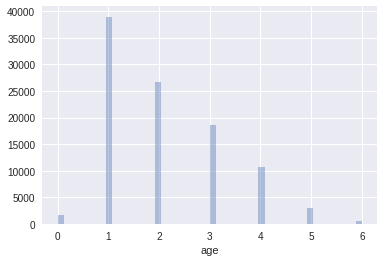

In [16]:
sns.distplot(df.iloc[:,1:4]['age'], kde=False,
#             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "g"}
            )

In [17]:
# sns.countplot?

In [18]:
df.iloc[:,1:4]['age'].value_counts()

1    38996
2    26744
3    18529
4    10654
5     2922
0     1666
6      489
Name: age, dtype: int64

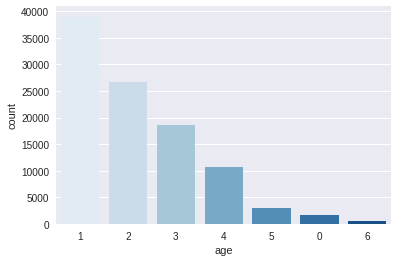

In [19]:
sns.countplot(df.iloc[:,1:4]['age'], 
              order=df.iloc[:,1:4]['age'].value_counts().index,
              palette="Blues"
              )

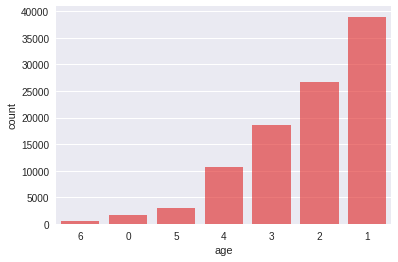

In [20]:
sns.countplot(df.iloc[:,1:4]['age'], 
              order=df.iloc[:,1:4]['age'].value_counts().index[::-1],
             color='red',
             alpha=.6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd84cf2b50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdd84be0e50>]], dtype=object)

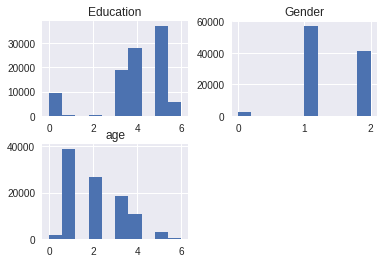

In [21]:
df.iloc[:,1:4].hist()

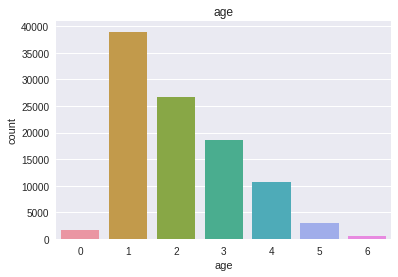

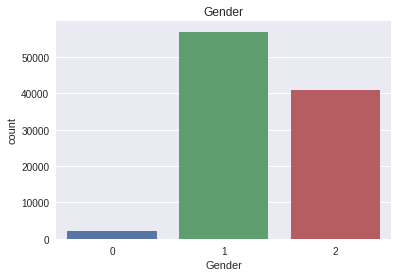

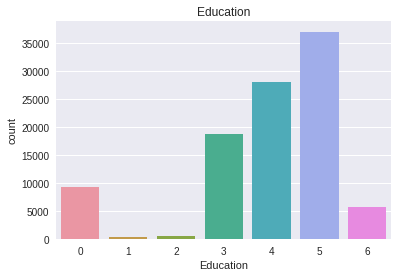

In [22]:
for i in df.iloc[:,1:4]:
    plt.figure()
    plt.title(i)
    
    sns.countplot(df.iloc[:,1:4][i])

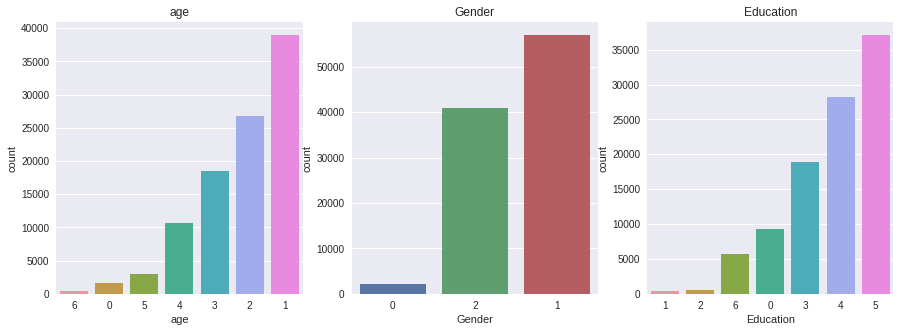

In [23]:
plt.figure(figsize=(15,5))

n=0
for i in df.iloc[:,1:4]:

    n+=1
    plt.subplot(1,3,n)
    
    plt.title(i)
    
    sns.countplot(df.iloc[:,1:4][i], order=df.iloc[:,1:4][i].value_counts().index[::-1])

In [29]:
df.to_csv('train.csv', index=False)

In [30]:
csv=pd.read_csv('train.csv')